In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
house_df=pd.read_csv('house_clean.csv')
house_df.head()

,SalePrice,LotFrontage,LotArea,YearBuilt,FullBath,HalfBath,BedroomAbvGr,GarageCars,GarageArea,Utilities_NoSeWa,...,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker
0,208500,65.0,8450,2003,2,1,3,2,548,0,...,0,0,0,0,0,0,0,0,0,0
1,181500,80.0,9600,1976,2,0,3,2,460,0,...,0,0,0,0,0,0,0,0,0,1
2,223500,68.0,11250,2001,2,1,3,2,608,0,...,0,0,0,0,0,0,0,0,0,0
3,140000,60.0,9550,1915,1,0,3,3,642,0,...,0,0,0,0,0,0,0,0,0,0
4,250000,84.0,14260,2000,2,1,4,3,836,0,...,1,0,0,0,0,0,0,0,0,0


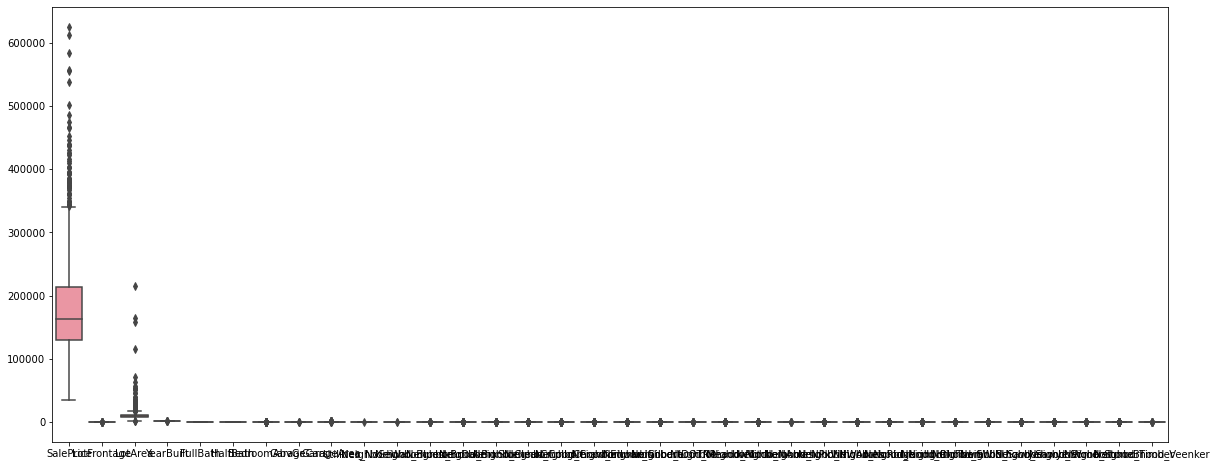

In [3]:
fig, ax=plt.subplots(figsize=(20,8))
sns.boxplot(data=house_df);

In [4]:
house_df1 =house_df.drop(columns='SalePrice')

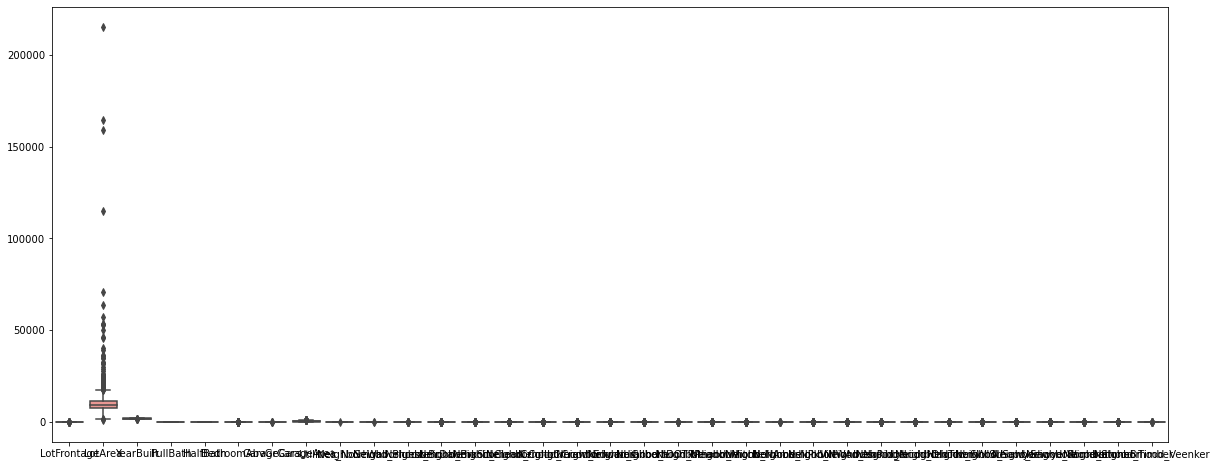

In [5]:
fig, ax=plt.subplots(figsize=(20,8))
sns.boxplot(data=house_df1);

In [6]:
house_df1.columns

Index(['LotFrontage', 'LotArea', 'YearBuilt', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'GarageCars', 'GarageArea', 'Utilities_NoSeWa',
       'Neighborhood_Blueste', 'Neighborhood_BrDale', 'Neighborhood_BrkSide',
       'Neighborhood_ClearCr', 'Neighborhood_CollgCr', 'Neighborhood_Crawfor',
       'Neighborhood_Edwards', 'Neighborhood_Gilbert', 'Neighborhood_IDOTRR',
       'Neighborhood_MeadowV', 'Neighborhood_Mitchel', 'Neighborhood_NAmes',
       'Neighborhood_NPkVill', 'Neighborhood_NWAmes', 'Neighborhood_NoRidge',
       'Neighborhood_NridgHt', 'Neighborhood_OldTown', 'Neighborhood_SWISU',
       'Neighborhood_Sawyer', 'Neighborhood_SawyerW', 'Neighborhood_Somerst',
       'Neighborhood_StoneBr', 'Neighborhood_Timber', 'Neighborhood_Veenker'],
      dtype='object')

In [7]:
house_df1.head()

,LotFrontage,LotArea,YearBuilt,FullBath,HalfBath,BedroomAbvGr,GarageCars,GarageArea,Utilities_NoSeWa,Neighborhood_Blueste,...,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker
0,65.0,8450,2003,2,1,3,2,548,0,0,...,0,0,0,0,0,0,0,0,0,0
1,80.0,9600,1976,2,0,3,2,460,0,0,...,0,0,0,0,0,0,0,0,0,1
2,68.0,11250,2001,2,1,3,2,608,0,0,...,0,0,0,0,0,0,0,0,0,0
3,60.0,9550,1915,1,0,3,3,642,0,0,...,0,0,0,0,0,0,0,0,0,0
4,84.0,14260,2000,2,1,4,3,836,0,0,...,1,0,0,0,0,0,0,0,0,0


<AxesSubplot:>

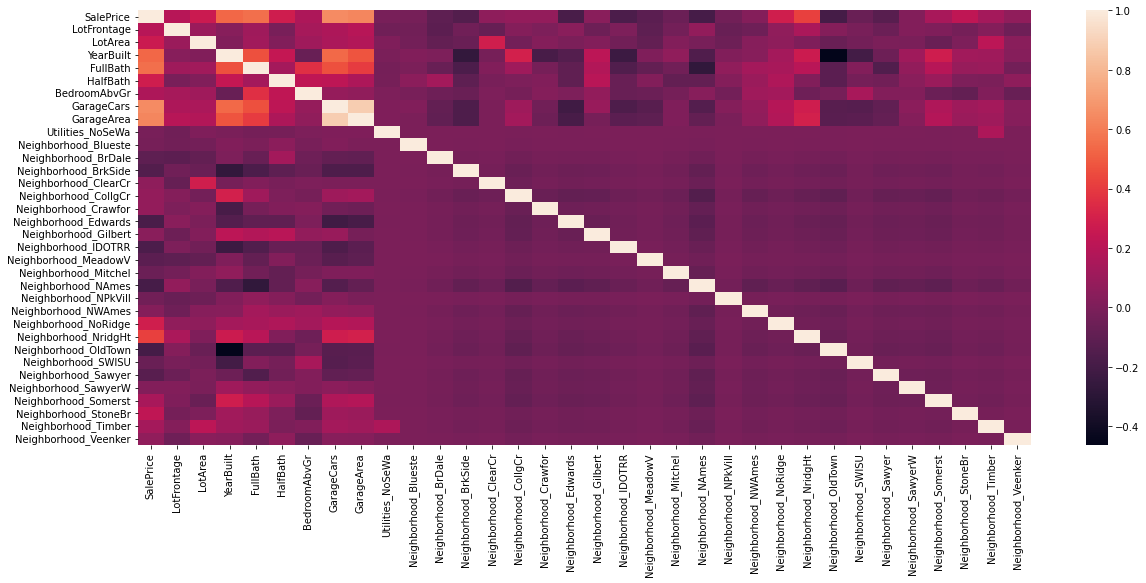

In [42]:
fig, ax=plt.subplots(figsize=(20,8))
sns.heatmap(house_df.corr(), annot=False)

In [43]:
#X_h3=house_df[['LotArea','YearBuilt',]]
X_h3=house_df[['LotArea', 'YearBuilt', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'GarageCars']]
y_h=house_df.SalePrice

In [44]:
house_df['SalePrice']

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1452    175000
1453    210000
1454    266500
1455    142125
1456    147500
Name: SalePrice, Length: 1457, dtype: int64

In [45]:
from sklearn.linear_model import LinearRegression

In [46]:
lr5=LinearRegression()
lr5.fit(X_h3,y_h)

LinearRegression()

In [47]:
coef_df=pd.DataFrame({'Features':X_h3.columns,'Effect Size':lr5.coef_}).set_index('Features').sort_values(by='Effect Size',ascending=False)
coef_df

,Effect Size
Features,
GarageCars,38934.196331
FullBath,36314.801632
HalfBath,18211.905861
YearBuilt,453.743977
BedroomAbvGr,115.887612
LotArea,1.309627


In [48]:
print('Model 3 predicted sale price: $'+str(lr5.predict([[11250]])[0]))

C:\Users\mccarthyg\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


ValueError: X has 1 features, but LinearRegression is expecting 6 features as input.

In [49]:
actuals=house_df['SalePrice'] # this is the same as our target series
preds=lr5.predict(X_h3)

In [50]:
compare_df=pd.DataFrame({'Predicted Sale Price':preds,'Actual Sale Price':actuals}).set_index(house_df.index)
compare_df.head(100)

,Predicted Sale Price,Actual Sale Price
0,228179.883659,208500
1,199222.961510,181500
2,230939.351380,223500
3,174098.492284,140000
4,273477.668695,250000
...,...,...
95,225364.603433,185000
96,210528.665317,214000
97,120712.797105,94750
98,99790.780946,83000


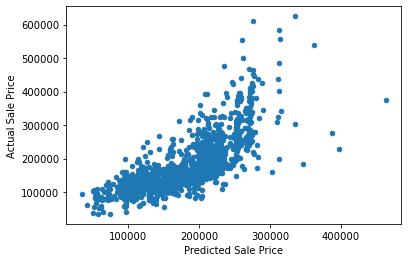

In [51]:
compare_df.plot(x='Predicted Sale Price',y='Actual Sale Price',kind='scatter');

In [38]:
from sklearn.metrics import mean_squared_error
import numpy as np

rmse=np.sqrt(mean_squared_error(preds,actuals))
print(rmse)

73889.15773008492


In [73]:
from sklearn.metrics import mean_absolute_error

mae=mean_absolute_error(preds,actuals)
print(mae)

43600.323205005516


In [74]:
lr5.score(X_h3,y_h)

0.35305927772884105

In [75]:
from sklearn.model_selection import train_test_split

In [76]:
X_trainh, X_testh, y_trainh, y_testh = train_test_split(X_h3,y_h, train_size=0.8,random_state=888)

In [77]:
lr6=LinearRegression()
lr6.fit(X_trainh,y_trainh)

LinearRegression()

In [78]:
print('Train score: '+str(lr6.score(X_trainh,y_trainh)))
print('Test score: '+str(lr6.score(X_testh,y_testh)))

Train score: 0.36200360915591245
Test score: 0.3145649008645154
